# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

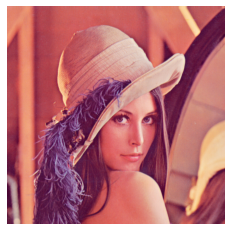

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./D00_lena.png', cv2.IMREAD_COLOR)[...,[2,1,0]]
plt.imshow(img)
plt.axis('off')
plt.show()

## 上下左右翻轉圖片

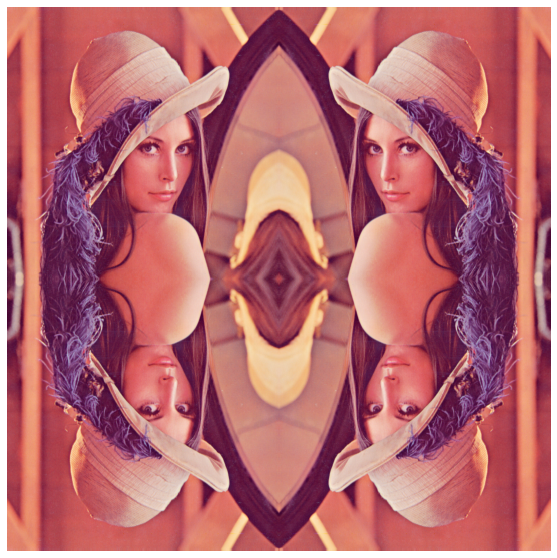

In [2]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,...]

# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合
flip_position = (img, img_hflip, img_vflip, img_hvflip)
img_flip = np.vstack((np.hstack(flip_position[:2]), np.hstack(flip_position[2:])))

# 顯示圖片
plt.figure(figsize = (10, 10))
plt.imshow(img_flip)
plt.axis('off')
plt.show()

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

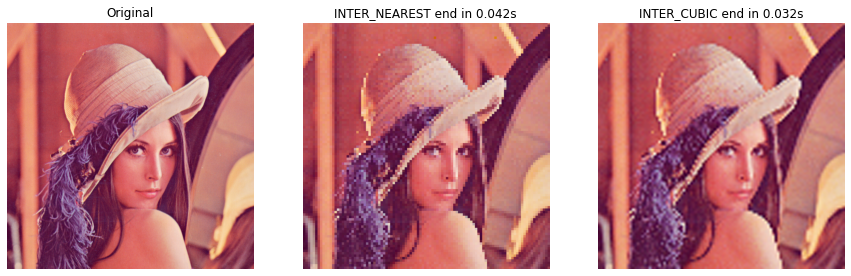

In [3]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx = 0.2, fy = 0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

plt.figure(figsize = (15,5))
for i,x in enumerate({'Original': 0,
                      'INTER_NEAREST': cv2.INTER_NEAREST,
                      'INTER_CUBIC': cv2.INTER_CUBIC}.items()):
    if i :
    
        # 鄰近差值 scale、雙立方差補 scale + 計算花費時間
        start = time.time()
        img_area_scale = cv2.resize(img_test, None, fx = fx, fy = fy, interpolation = x[1])
        end = time.time()
    
    # 開始做圖
    plt.subplot(1, 3, i+1, title = f'{x[0]} end in {(end - start):.3f}s' if i else x[0])
    plt.imshow(img_area_scale if i else img)
    plt.axis('off')
plt.show()

## 平移幾何轉換

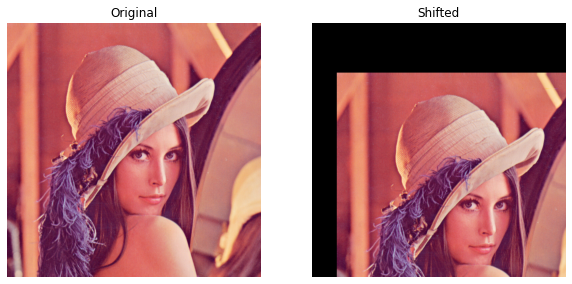

In [4]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50], [0, 1, 100]], dtype = np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
plt.figure(figsize=(10,5))
for i in range(2):
    plt.subplot(1, 2, i+1, title = 'Shifted' if i else 'Original')
    plt.imshow(shift_img if i else img)
    plt.axis('off')
plt.show()